1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

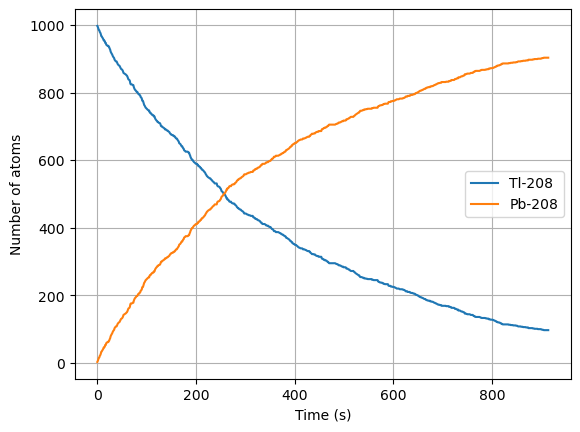

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri
T_half = 3.052 * 60          # s
tau = T_half / np.log(2)
dt = 1.0                     # s
N0 = 1000

# Tempo totale (5 half-lives circa)
t_max = int(5 * T_half)
time = np.arange(0, t_max, dt)

# Inizializzazione
Tl = N0
Pb = 0

Tl_history = []
Pb_history = []

# Probabilità di decadimento in dt
p = 1 - 2**(-dt / tau)

rng = np.random.default_rng()

for _ in time:
    # Decadimenti in questo passo
    decays = rng.random(Tl) < p
    n_decays = np.sum(decays)

    Tl -= n_decays
    Pb += n_decays

    Tl_history.append(Tl)
    Pb_history.append(Pb)

# Plot
plt.plot(time, Tl_history, label="Tl-208")
plt.plot(time, Pb_history, label="Pb-208")
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")
plt.legend()
plt.grid()
plt.show()


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [2]:
import numpy as np

# Costanti fisiche
Z = 79
e = 1.602e-19          # C
eps0 = 8.854e-12       # F/m
E = 7.7e6 * e          # J
a0 = 5.29e-11          # m

# Parametri simulazione
N = 1_000_000
sigma = a0 / 100

rng = np.random.default_rng()

# Estrazione del beam (gaussiana 2D)
x = rng.normal(0, sigma, N)
y = rng.normal(0, sigma, N)

# Impact parameter
b = np.sqrt(x**2 + y**2)

# b critico per backscattering
b_crit = Z * e**2 / (2 * np.pi * eps0 * E)

# Conteggio particelle che rimbalzano
backscattered = np.sum(b < b_crit)

fraction = backscattered / N

print(f"b_crit = {b_crit:.3e} m")
print(f"Backscattered fraction = {fraction:.3e}")


b_crit = 2.954e-14 m
Backscattered fraction = 1.551e-03


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [ ]:
import numpy as np

def f(x):
    return np.sin(x/2)**2 * (2 - x)

# Parametri
N = 1_000_000
x_min, x_max = 0, 2

# Stima di f_max (sicura)
x_test = np.linspace(0, 2, 10_000)
f_max = np.max(f(x_test))

rng = np.random.default_rng()

# Estrazione casuale
x = rng.uniform(x_min, x_max, N)
y = rng.uniform(0, f_max, N)

hits = y < f(x)
N_hit = np.sum(hits)

# Integrale stimato
I_hitmiss = (N_hit / N) * (2 * f_max)

# Errore statistico
error_hitmiss = (2 * f_max) * np.sqrt(
    (N_hit / N) * (1 - N_hit / N) / N
)

print("Hit/Miss method")
print(f"I = {I_hitmiss:.6f} ± {error_hitmiss:.6f}")


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [3]:
import numpy as np

N = 1_000_000
rng = np.random.default_rng()

# Estrazione uniforme nel quadrato
x = rng.uniform(-1, 1, N)
y = rng.uniform(-1, 1, N)

# Condizione del cerchio
inside = x**2 + y**2 <= 1
N_inside = np.sum(inside)

# Area stimata
area_circle = 4 * N_inside / N

# Errore statistico
error = 4 * np.sqrt((N_inside/N) * (1 - N_inside/N) / N)

print(f"Area (MC) = {area_circle:.6f} ± {error:.6f}")
print(f"Valore vero = {np.pi:.6f}")


Area (MC) = 3.140840 ± 0.001643
Valore vero = 3.141593


In [4]:
D = 10
N = 5_000_000   # serve più statistica!
rng = np.random.default_rng()

# Estrazione nel cubo [-1,1]^10
x = rng.uniform(-1, 1, (N, D))

# Norma al quadrato
r2 = np.sum(x**2, axis=1)

inside = r2 <= 1
N_inside = np.sum(inside)

# Volume stimato
volume_10D = (2**D) * N_inside / N

# Errore statistico
error_10D = (2**D) * np.sqrt(
    (N_inside/N) * (1 - N_inside/N) / N
)

print(f"Volume 10D (MC) = {volume_10D:.6e} ± {error_10D:.6e}")


Volume 10D (MC) = 2.570035e+00 ± 2.291336e-02


In [5]:
from math import pi, gamma

V_true = pi**5 / gamma(6)
print(f"Valore teorico = {V_true:.6e}")


Valore teorico = 2.550164e+00


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [6]:
import numpy as np

N = 1_000_000
rng = np.random.default_rng()

# Campionamento dalla distribuzione w(x) ~ 1/sqrt(x)
u = rng.random(N)
x = u**2  # inverse transform

# Funzione f(x)/w(x)
fx_w = np.sqrt(x) * np.exp(x + 1)

# Stima integrale
I = np.mean(fx_w)
error = np.std(fx_w, ddof=1) / np.sqrt(N)

print(f"Integral = {I:.6f} ± {error:.6f}")


Integral = 2.335057 ± 0.001956
